In [ ]:
import tensorflow as tf
import pandas as pd
import itertools
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from PIL import Image
import glob
import shutil
import random
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt


```
# pd.read_csv {as the name suggest is used to read .csv file to the given variable}
# train_data.shape {used to find the size of the .csv file}
```

In [ ]:
train_data = pd.read_csv('E:/Nikesh/train.csv')
print(train_data.shape)

(28709, 2)


```
# np.array() {converts n-dim arrays to a numpy array}
# reshape(len,ht) {reshape the array to the size we want}
# np.zeros(len,ht,color_channel(RGB == 3; Gray == 1)) {used to initialize numpy array to zeros}
# astype(_data_type_) {converts the array to desired data type}
```



In [ ]:
def convert2image(row):
    pixels = row['pixels']
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48,1))
    image[:,:,0] = img
    #image[:,:,1] = img
    #image[:,:,2] = img
    return image.astype(np.uint8)

In [ ]:
def labels(num):
  if (num == 0):
    return "Angry"
  elif (num == 1):
    return "Disgust"
  elif (num == 2):
    return "Fear"
  elif (num == 3):
    return "Happy"
  elif (num == 4):
    return "Sad"
  elif (num == 5):
    return "Surprise"
  elif (num == 6):
    return "Neutral"

**Its the feeder algo to feed the pixel data to convert it into images.**
```
# .iloc[row] {gives the entire row} or #.iloc[row,col] {gives the sepcific data}
# cv2.imwrite(path where to save, n-dim array) {writes the n-dimesional array to an image}
# cv2.imshow(name of the window where image will be displayed, n-dim array) {used to display images}
``` 


In [ ]:
count = 0  # initialize counter
#emotions = []
#print(train_data.iloc[18,0]) shows the 0th column
for i in range(0, train_data.shape[0]):  #data.shape[0] gives no. of rows
  #emotions.append(train_data.iloc[i,0])
  face = train_data.iloc[i]  # remove one row from the data
  img = convert2image(face)  # send this row of to the function 
  #cv2.imshow("image", img) 
  #cv2.waitKey(0)  # closes the image window when you press a key   
  count+=1  # counter to save the images with different name   
  cv2.imwrite(r'E:/Nikesh/Images/'+ labels(train_data.iloc[i,0]) + str(count) +'.jpg',img) # path of location
#emotion = np.array(emotions)
#print(emotion.shape)
#print(emotion)

```
# os.chdir(directory path) {used to change directory}
# os.path.isdir(directory) {used to check if the directory exist or not}
# os.makedirs(directory path) {used to make directory}
```



In [ ]:
os.chdir('E:/Nikesh/Images/')
if os.path.isdir('train') is False:
    os.makedirs('train/Angry')
    os.makedirs('train/Disgust')
    os.makedirs('train/Fear')
    os.makedirs('train/Happy')
    os.makedirs('train/Sad')
    os.makedirs('train/Surprise')
    os.makedirs('train/Neutral')

In [ ]:
os.chdir('E:/Nikesh/Images/')
if os.path.isdir('valid') is False:
    os.makedirs('valid/Angry')
    os.makedirs('valid/Disgust')
    os.makedirs('valid/Fear')
    os.makedirs('valid/Happy')
    os.makedirs('valid/Sad')
    os.makedirs('valid/Surprise')
    os.makedirs('valid/Neutral')

In [ ]:
os.chdir('E:/Nikesh/Images/')
if os.path.isdir('test') is False:
    os.makedirs('test/Angry')
    os.makedirs('test/Disgust')
    os.makedirs('test/Fear')
    os.makedirs('test/Happy')
    os.makedirs('test/Sad')
    os.makedirs('test/Surprise')
    os.makedirs('test/Neutral')

```
# glob.glob(name) Return a possibly-empty list of path names that match name {name* returns every path name associated with the name}
# for c in random.sample(glob.glob('Angry*'),500) means it is copying randomly selected path name from glob.glob() to c and then
# shutil.move(source path, move path) {moves the above image to the path specified}
```



In [ ]:
for c in random.sample(glob.glob('Angry*'),2000):
    shutil.move(c,'E:/Nikesh/Images/train/Angry')
for c in random.sample(glob.glob('Disgust*'),150):
    shutil.move(c,'E:/Nikesh/Images/train/Disgust')
for c in random.sample(glob.glob('Fear*'),2000):
    shutil.move(c,'E:/Nikesh/Images/train/Fear')
for c in random.sample(glob.glob('Happy*'),2000):
    shutil.move(c,'E:/Nikesh/Images/train/Happy')
for c in random.sample(glob.glob('Sad*'),2000):
    shutil.move(c,'E:/Nikesh/Images/train/Sad')
for c in random.sample(glob.glob('Surprise*'),2000):
    shutil.move(c,'E:/Nikesh/Images/train/Surprise')
for c in random.sample(glob.glob('Neutral*'),2000):
    shutil.move(c,'E:/Nikesh/Images/train/Neutral')

In [ ]:
for c in random.sample(glob.glob('Angry*'),1000):
    shutil.move(c,'E:/Nikesh/Images/valid/Angry')
for c in random.sample(glob.glob('Disgust*'),150):
    shutil.move(c,'E:/Nikesh/Images/valid/Disgust')
for c in random.sample(glob.glob('Fear*'),1000):
    shutil.move(c,'E:/Nikesh/Images/valid/Fear')
for c in random.sample(glob.glob('Happy*'),1000):
    shutil.move(c,'E:/Nikesh/Images/valid/Happy')
for c in random.sample(glob.glob('Sad*'),1000):
    shutil.move(c,'E:/Nikesh/Images/valid/Sad')
for c in random.sample(glob.glob('Surprise*'),1000):
    shutil.move(c,'E:/Nikesh/Images/valid/Surprise')
for c in random.sample(glob.glob('Neutral*'),1000):
    shutil.move(c,'E:/Nikesh/Images/valid/Neutral')

In [ ]:
for c in random.sample(glob.glob('Angry*'),100):
    shutil.move(c,'E:/Nikesh/Images/test/Angry')
for c in random.sample(glob.glob('Disgust*'),100):
    shutil.move(c,'E:/Nikesh/Images/test/Disgust')
for c in random.sample(glob.glob('Fear*'),100):
    shutil.move(c,'E:/Nikesh/Images/test/Fear')
for c in random.sample(glob.glob('Happy*'),100):
    shutil.move(c,'E:/Nikesh/Images/test/Happy')
for c in random.sample(glob.glob('Sad*'),100):
    shutil.move(c,'E:/Nikesh/Images/test/Sad')
for c in random.sample(glob.glob('Surprise*'),100):
    shutil.move(c,'E:/Nikesh/Images/test/Surprise')
for c in random.sample(glob.glob('Neutral*'),100):
    shutil.move(c,'E:/Nikesh/Images/test/Neutral')

In [ ]:
train_path = 'E:/Nikesh/Images/train'
Vali_path = 'E:/Nikesh/Images/valid'
test_path = 'E:/Nikesh/Images/test'

```
# ImageDataGenerator {}
# flow_from_directory(directory_path, target_size=(len,ht), classes = ['-'], batch_size=*x*) 
{it takes the image stored in batches of *x* from directory path reshapes it and sends to model.fit to train}
```



In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(48,48), classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise'], batch_size=20)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=Vali_path, target_size=(48,48), classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise'], batch_size=20)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(48,48), classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise'], batch_size=20, shuffle = False )
#preprocessing_function=tf.keras.applications.vgg16.preprocess_input

Found 12150 images belonging to 7 classes.
Found 6150 images belonging to 7 classes.
Found 700 images belonging to 7 classes.


numpy axes [link](https://www.sharpsightlabs.com/blog/numpy-axes-explained/)

In [ ]:
imgs, label = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(48,48))
    #axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

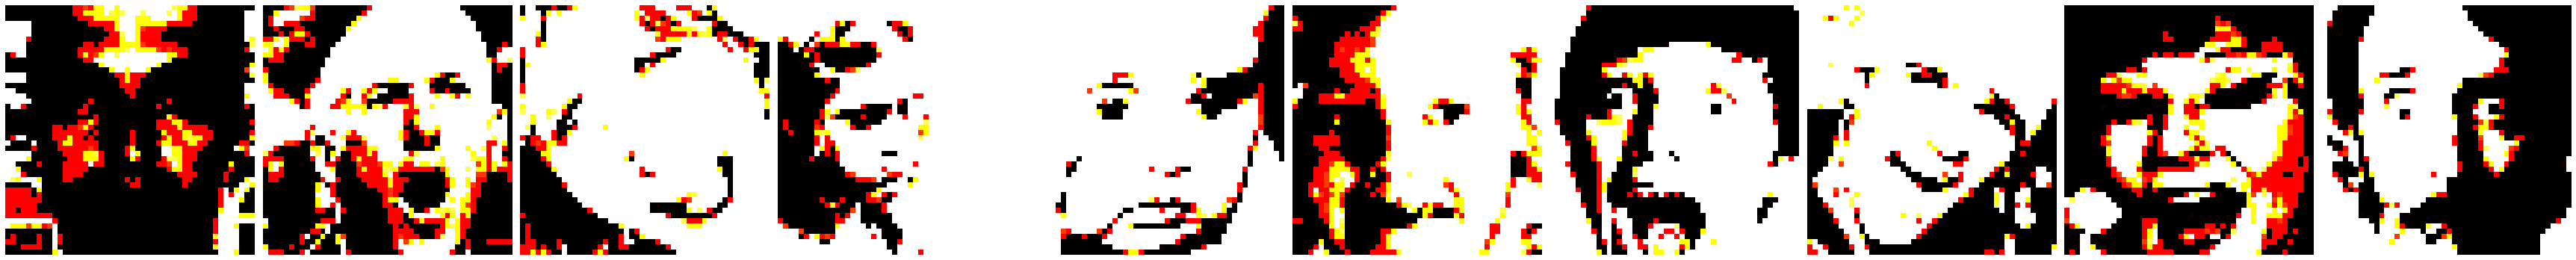

[[0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
plotImages(imgs)
print(label)

In [ ]:
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 128)      

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



for verbose use the [link](https://stackoverflow.com/questions/47902295/what-is-the-use-of-verbose-in-keras-while-validating-the-model)



In [ ]:
model.fit(x=train_batches, steps_per_epoch=len(train_batches), 
          validation_data=valid_batches, validation_steps=len(valid_batches),
          epochs=35, verbose = 2)

Epoch 1/35
608/608 - 191s - loss: 1.9276 - accuracy: 0.2465 - val_loss: 1.8955 - val_accuracy: 0.2659
Epoch 2/35
608/608 - 178s - loss: 1.6527 - accuracy: 0.3490 - val_loss: 1.5189 - val_accuracy: 0.4036
Epoch 3/35
608/608 - 179s - loss: 1.4828 - accuracy: 0.4228 - val_loss: 1.3935 - val_accuracy: 0.4608
Epoch 4/35
608/608 - 180s - loss: 1.3727 - accuracy: 0.4705 - val_loss: 1.4420 - val_accuracy: 0.4454
Epoch 5/35
608/608 - 182s - loss: 1.3060 - accuracy: 0.5017 - val_loss: 1.3706 - val_accuracy: 0.4837
Epoch 6/35
608/608 - 181s - loss: 1.2414 - accuracy: 0.5218 - val_loss: 1.2922 - val_accuracy: 0.5174
Epoch 7/35
608/608 - 180s - loss: 1.1743 - accuracy: 0.5535 - val_loss: 1.2607 - val_accuracy: 0.5179
Epoch 8/35
608/608 - 180s - loss: 1.1360 - accuracy: 0.5716 - val_loss: 1.2891 - val_accuracy: 0.5200
Epoch 9/35
608/608 - 179s - loss: 1.0740 - accuracy: 0.5926 - val_loss: 1.2432 - val_accuracy: 0.5410
Epoch 10/35
608/608 - 179s - loss: 1.0186 - accuracy: 0.6136 - val_loss: 1.3149 - 

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)



```
# np.round() {rounds of to the nearest decimal}
```



In [ ]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)



```
# confusion_matrix(orignal_label, predicted_label, axis)
```
axis [link](https://stackoverflow.com/questions/36300334/understanding-argmax)



In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
test_batches.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

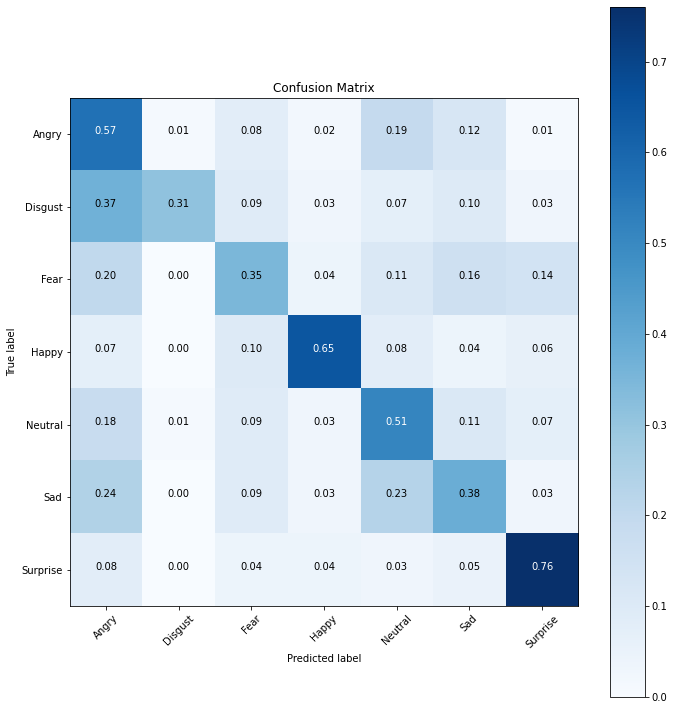

In [ ]:
cm_plot_labels = ['Angry','Disgust', 'Fear','Happy','Neutral','Sad','Surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')